<h2> Kelvin Carrington Tichana </h2>
<h3> Communicate Findings Project: Slide Deck </h3>

<h3>The Dataset: ProsperLoanData </h3>
<p>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.</p>
We will do the following:
<li> Univariate Exploration</li>
<li>Bivariate Exploration</li>
<li>Multivariate Exploration</li>

<h3>Questions:</h3>
<ol>
    <li>What is the distribution of the employment status of the Loanees?
    <li>What is the range of loan amounts in the Prosper loan dataset?
    <li>What is the most common loan amount in the dataset?
    <li>Are there any outliers in the distribution of loan amounts?
    <li>What is the distribution of BorrowerAPR in the Prosper loan dataset?
    <li>Are there any notable peaks or modes in the distribution of BorrowerAPR?
    <li>What is the range of BorrowerAPR values in the dataset?
    <li>Does the distribution of BorrowerAPR appear normal or approximately normal?
    <li>Where is the center or mode of the distribution of BorrowerAPR?
    <li>What is the median BorrowerAPR in the Prosper loan dataset?
    <li>Are there any extreme values or outliers in the distribution of BorrowerAPR?
    <li>What is the middle 50% of the BorrowerAPR values, as represented by the IQR?
    <li>How are Loan interest rates distributed?
    <li>What is the mean?
    <li>Any outliers?
    <li>What is the correlation between loan amount and income?
    <li>How does the borrower APR affect the loan amount?
    <li>Does the rating affect the Loan amount?
    <li>How are all numerical values correlated? Could we analyse all at once?
    </ol>
    

In [2]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
target = pd.read_csv('clean.csv')
#target.head()

What is the distribution of the employment status of the Loanees?

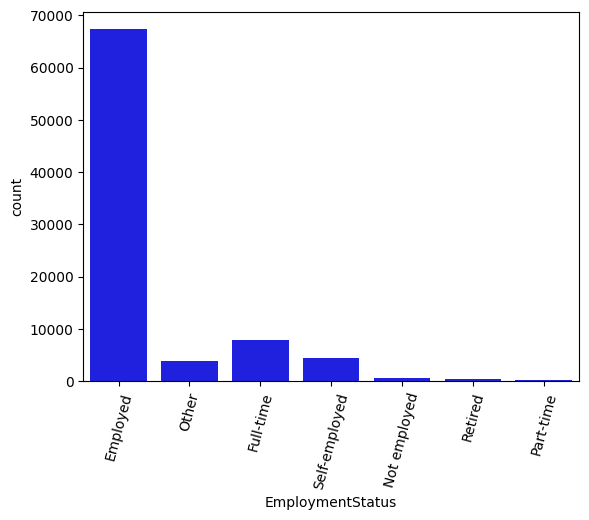

In [4]:
#let us get employement status
sns.countplot(data = target, x = 'EmploymentStatus', color = 'b');
plt.xticks(rotation = 75);

The majority of loanees are employed , over 65 000

<li>What is the range of loan amounts in the Prosper loan dataset?</li>
<li>What is the most common loan amount in the dataset?</li>
<li>Are there any outliers in the distribution of loan amounts?</li>


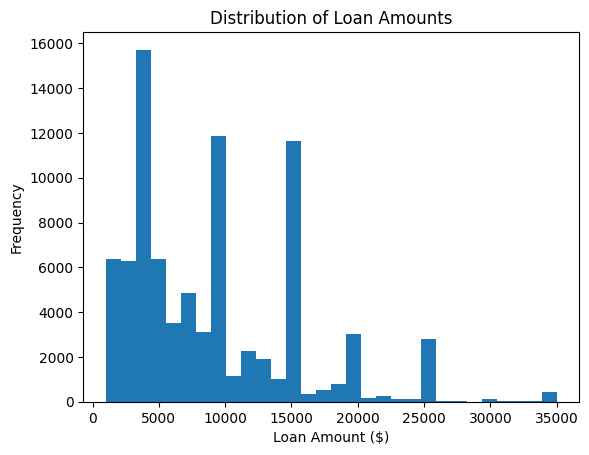

In [5]:
# plot histogram of loan amounts
plt.hist(target['LoanOriginalAmount'], bins=30)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

<li> The range of loan amounts in the Prosper loan dataset is from 1,000 to 35,000, with most loans falling in the 4,000 to 15,000 range.</li>
<li>The most common loan amount in the dataset is 4,000, with a frequency of over 15,000 loans</li>
<li>There are some outliers in the distribution of loan amounts, with a small number of loans exceeding 25,000 or 30,000.</li>

<ol>
<li>What is the distribution of BorrowerAPR in the Prosper loan dataset?</li>
<li>Are there any notable peaks or modes in the distribution of BorrowerAPR?</li>
<li>What is the range of BorrowerAPR values in the dataset?</li>
<li>Does the distribution of BorrowerAPR appear normal or approximately normal?</li>
<li>Where is the center or mode of the distribution of BorrowerAPR?</li>
<li>What is the median BorrowerAPR in the Prosper loan dataset?</li>
<li>Are there any extreme values or outliers in the distribution of BorrowerAPR?</li>
<li>What is the middle 50% of the BorrowerAPR values, as represented by the IQR?</li>
</ol> 

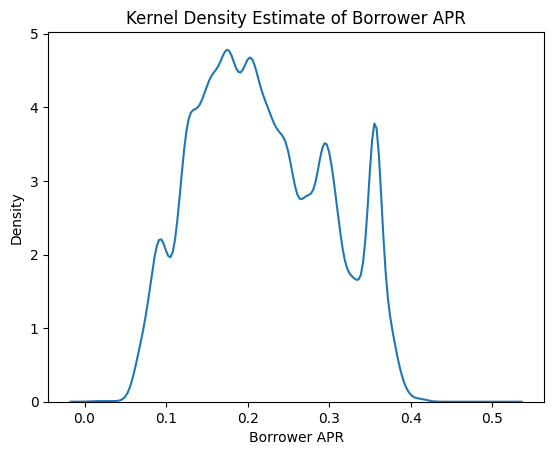

In [6]:
sns.kdeplot(df['BorrowerAPR'])
plt.title('Kernel Density Estimate of Borrower APR')
plt.xlabel('Borrower APR')
plt.show()

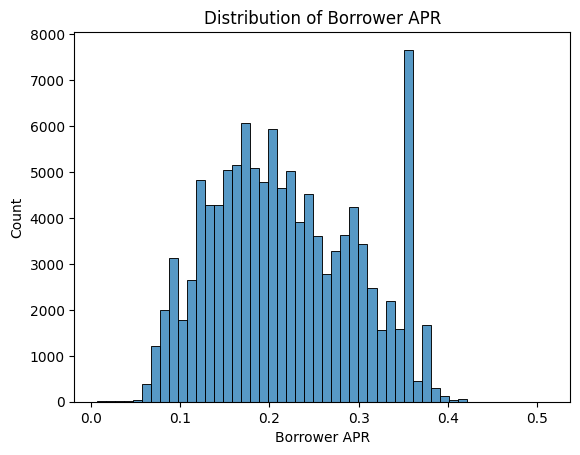

In [7]:
# Plot a histogram of the BorrowerAPR variable
sns.histplot(df['BorrowerAPR'], kde=False, bins=50)
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.show()

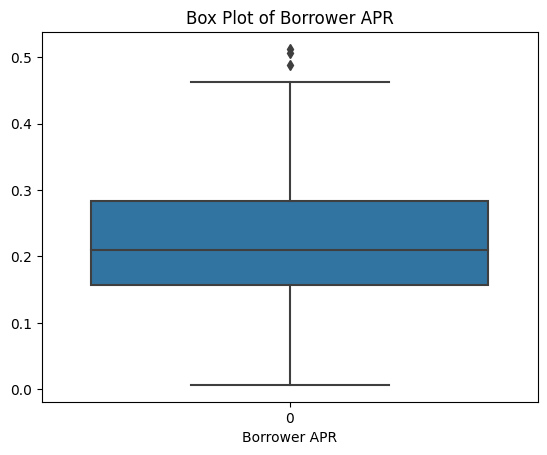

In [8]:
sns.boxplot(df['BorrowerAPR'])
plt.title('Box Plot of Borrower APR')
plt.xlabel('Borrower APR')
plt.show()

<h4>Summary of the 3 plots</h4>
<li>Histogram:
<p>The distribution of BorrowerAPR is approximately normal, with a peak around 0.2.
The majority of loans have an APR between 0.1 and 0.3.
    There are a few loans with APRs as high as 0.5.</p></li>
<li>Kernel density plot:
<p>Confirms the findings from the histogram, showing a normal-like distribution with a peak around 0.2.</p></li>
<li>Box plot:
<p>The median APR is around 0.2, with the majority of loans falling between 0.1 and 0.3.
There are a few loans with APRs above 0.4, which are considered outliers.
The box spans the IQR, or the middle 50% of the data, with the whiskers extending out to 1.5 times the IQR.</p></li>


What is the correlation between loan amount and income?

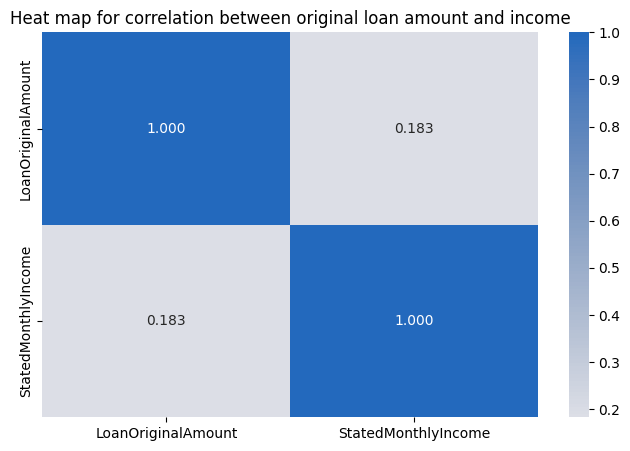

In [9]:
#let us create two lists, one with numerical values and the other with categorical values such that they are related
numValues = ['LoanOriginalAmount', 'StatedMonthlyIncome']
catvalues = ['Term', 'EmploymentStatus']
# now we want to find the correllation coefficients
plt.figure(figsize = [8, 5])
plt.title('Heat map for correlation between original loan amount and income')
sns.heatmap(target[numValues].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

The correlation coefficient for loan original amount to stated income is 0.183

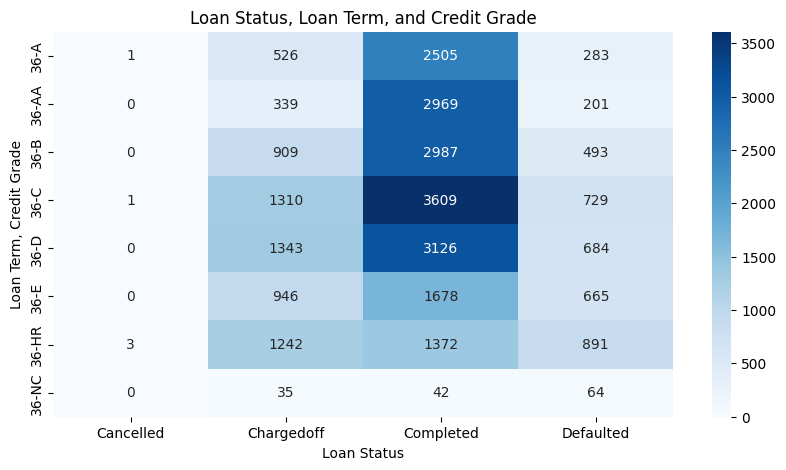

In [10]:

#heat map to see the relationship of  Loan Status, Loan Term, and Credit Grade
status_term_grade = df.groupby(['LoanStatus', 'Term', 'CreditGrade']).size().reset_index(name='count')
pivot = status_term_grade.pivot_table(index=['Term', 'CreditGrade'], columns='LoanStatus', values='count', fill_value=0)
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='d')
plt.title('Loan Status, Loan Term, and Credit Grade')
plt.xlabel('Loan Status')
plt.ylabel('Loan Term, Credit Grade')
plt.show()


From the heatmap, we can see that most loans are current, followed by completed loans. We can also see that most loans have a term of 36 months, with fewer loans having a term of 60 months. In terms of credit grade, most loans have a credit grade of C or D, with fewer loans having a credit grade of A or AA. The heatmap also shows that loans with a term of 60 months and a credit grade of A or AA are relatively rare.

References:
<ol>
<li>Exploratory Data Analysis in Python: An Introduction to Univariate and Multivariate Techniques: https://towardsdatascience.com/exploratory-data-analysis-in-python-an-introduction-to-univariate-and-multivariate-techniques-ea0764b8a6b4
</li>
<li>Multivariate Data Visualization in Python: https://towardsdatascience.com/multivariate-data-visualization-in-python-8a4f6766d8f1
</li>
<li>seaborn documentation: https://seaborn.pydata.org/index.html.</li>
   <li>Udacity Data Analytics Nanodegree: https://www.udacity.com/course/data-analyst-nanodegree--nd002
</li>
</ol>    

In [ ]:
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide_deck.ipynb to slides
[NbConvertApp] Writing 839450 bytes to Slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide_deck.slides.html
Use Control-C to stop this server
